# AutoEncoder 코드 

In [ ]:
import os
import tqdm
files = {"X_val_enc":"1IAvlfsYw13kC6jVUj6jOdqSAwBNQLS3G",
         "X_train_enc":"1rPCnDqif5epOr-F2ypwnoUX9k8TcO4Ia",
         "X_test_enc":"1ctp5kNmNzljgsi1W8X4W7gN3o7y6flUJ",
        "X_val":"1-7CBfLwKpPAqFqA1vq8EZJe1olGw3zsu",
         "X_train":"1-18adV66ZrHnpzsfer6MfS7HU71CT0Cf",
         "X_test":"1-9vV59f_kCgTuh-P-_Nq5uSHzshBCpvT",
         "y_train":"1LH2LoFZg8YgjBHCNvPEGD_ltROLohaYI",
         "y_test":"1-4nHZFlaHKshaa_CE6w36z4gL9bVrz6k",
         "y_val":"1-1N-5ilxadcYtWguUPAS21BbfzUiLgDl"}
print("Now starting To download!")
for name, idx in tqdm.tqdm_notebook(files.items()):
    os.system(f'wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate "https://docs.google.com/uc?export=download&id={idx}" -O- | sed -rn "s/.*confirm=([0-9A-Za-z_]+).*/\1\n/p")&id={idx}" -O {name}.npy && rm -rf /tmp/cookies.txt')

Now starting To download!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


In [ ]:
import numpy as np

X_auto_val = np.load("X_val_enc.npy")
X_auto_test = np.load("X_test_enc.npy")
X_auto_train = np.load("X_train_enc.npy")

X_val = np.load("X_val.npy")
X_test = np.load("X_test.npy")
X_train = np.load("X_train.npy")

y_val = np.load("y_val.npy")
y_test = np.load("y_test.npy")
y_train = np.load("y_train.npy")

In [ ]:
from xgboost import XGBClassifier # model
from xgboost import plot_importance # 중요변수 시각화
from sklearn.model_selection import train_test_split # train/test
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

# 전처리된 데이터를 활용한 코드

In [ ]:
model = xgb.XGBClassifier()
param_grid = {'booster' :['gbtree'],
                 'max_depth':[4,5,6],
                 'min_child_weight':[1,3],
                 'gamma':[1,2,3],
                 'colsample_bytree':[0.5, 0.7, 0.9],
                 'colsample_bylevel':[0.7, 0.9],
                 'n_estimators':[300,400,500],
                 'objective':['binary:logistic'],
                 'learning_rate': [0.01, 0.05, 0.1],
                 'random_state':[0]}
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

In [ ]:
gcv = GridSearchCV(model,
                   param_grid = param_grid, 
                   cv = cv, 
                   scoring='accuracy', 
                   verbose = 2)

In [ ]:
eval_set =  [(X_auto_train, y_train), (X_auto_val, y_val)]
gcv.fit(X_auto_train,y_train, eval_set =eval_set,early_stopping_rounds=100 )
print('final params', gcv.best_params_) 
print('best score', gcv.best_score_)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
[CV] booster=gbtree, colsample_bylevel=0.7, colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=300, objective=binary:logistic, random_state=0 
[0]	validation_0-error:0.137255	validation_1-error:0.407407
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 100 rounds.
[1]	validation_0-error:0.130719	validation_1-error:0.407407
[2]	validation_0-error:0.124183	validation_1-error:0.296296
[3]	validation_0-error:0.091503	validation_1-error:0.296296
[4]	validation_0-error:0.084967	validation_1-error:0.296296
[5]	validation_0-error:0.071895	validation_1-error:0.333333
[6]	validation_0-error:0.078431	validation_1-error:0.296296
[7]	validation_0-error:0.078431	validation_1-error:0.296296
[8]	validation_0-error:0.071895	validation_1-error:0.296296
[9]	validation_0-error:0.078431	validation_1-

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[57]	validation_0-error:0.065359	validation_1-error:0.296296
[58]	validation_0-error:0.071895	validation_1-error:0.296296
[59]	validation_0-error:0.071895	validation_1-error:0.296296
[60]	validation_0-error:0.071895	validation_1-error:0.296296
[61]	validation_0-error:0.058824	validation_1-error:0.296296
[62]	validation_0-error:0.065359	validation_1-error:0.296296
[63]	validation_0-error:0.058824	validation_1-error:0.296296
[64]	validation_0-error:0.071895	validation_1-error:0.296296
[65]	validation_0-error:0.078431	validation_1-error:0.296296
[66]	validation_0-error:0.071895	validation_1-error:0.296296
[67]	validation_0-error:0.071895	validation_1-error:0.296296
[68]	validation_0-error:0.071895	validation_1-error:0.296296
[69]	validation_0-error:0.065359	validation_1-error:0.296296
[70]	validation_0-error:0.065359	validation_1-error:0.296296
[71]	validation_0-error:0.065359	validation_1-error:0.296296
[72]	validation_0-error:0.065359	validation_1-error:0.296296
[73]	validation_0-error:

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[19]	validation_0-error:0.045752	validation_1-error:0.296296
[20]	validation_0-error:0.052288	validation_1-error:0.296296
[21]	validation_0-error:0.045752	validation_1-error:0.296296
[22]	validation_0-error:0.045752	validation_1-error:0.296296
[23]	validation_0-error:0.045752	validation_1-error:0.296296
[24]	validation_0-error:0.045752	validation_1-error:0.296296
[25]	validation_0-error:0.045752	validation_1-error:0.296296
[26]	validation_0-error:0.045752	validation_1-error:0.296296
[27]	validation_0-error:0.052288	validation_1-error:0.296296
[28]	validation_0-error:0.052288	validation_1-error:0.296296
[29]	validation_0-error:0.052288	validation_1-error:0.296296
[30]	validation_0-error:0.052288	validation_1-error:0.296296
[31]	validation_0-error:0.052288	validation_1-error:0.296296
[32]	validation_0-error:0.052288	validation_1-error:0.296296
[33]	validation_0-error:0.052288	validation_1-error:0.296296
[34]	validation_0-error:0.052288	validation_1-err

In [ ]:
gcv.score(X_auto_test, y_test)

0.75

In [ ]:
y_pred = gcv.predict(X_auto_test)
y_pred_softmax =gcv.predict_proba(X_auto_test)[:,1]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


def evaluation(y_true, y_pred, model_name = "XGBoost"): 
    # 실제값, 모델이 예측한 값 순서로 넣어주세요. model_name은 plot에 나올 제목 이름입니다. # 라벨 순서는 0이 정상 1이 질병입니다.
    print(classification_report(y_true, y_pred))

    plt.figure(figsize=[8,8])
    plt.title(model_name+" confusion matrix", fontsize = 20)
    labels = ["Negative", "Positive"]
    conf_m = pd.DataFrame(confusion_matrix(y_true, y_pred), index = labels, columns = labels)
    ax = sns.heatmap(conf_m, cmap="Blues", annot=True,fmt='5')
    plt.yticks(va="center")
    plt.savefig("/content/"+model_name+"_confusion_matrix.pdf")

def AUROC_Curve(y_true, y_pred_softmax, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_softmax)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.02])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model_name)
    plt.legend(loc="lower right")
    plt.savefig("/content/"+model_name+"_auroc_curve.pdf")

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.60      0.50      0.55         6

    accuracy                           0.75        20
   macro avg       0.70      0.68      0.69        20
weighted avg       0.74      0.75      0.74        20



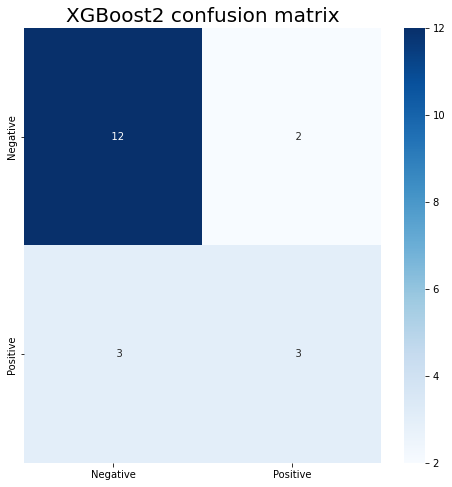

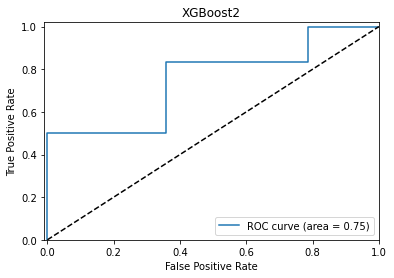

In [ ]:
evaluation(y_test, y_pred, "XGBoost2")
AUROC_Curve(y_test, y_pred_softmax, "XGBoost2")

In [ ]:
np.save("/content/xgboost_y_pred",y_pred)


# 전처리를 안한 데이터를 활용한 코드 

In [ ]:
import os
import pandas as pd

os.chdir("C:/Users/Kyuree Jeon/Desktop/귤/20-2/딥러닝/기말 팀플/모델링 데이터")

In [ ]:
import numpy as np

X_auto_val = np.load("X_auto_val.npy")
X_auto_test = np.load("X_auto_test.npy")
X_auto_train = np.load("X_auto_train.npy")

X_val = np.load("X_val.npy")
X_test = np.load("X_test.npy")
X_train = np.load("X_train.npy")

y_val = np.load("y_val.npy")
y_test = np.load("y_test.npy")
y_train = np.load("y_train.npy")

In [ ]:
y_train

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0], dtype=int64)

# XGBoost

In [ ]:
from xgboost import XGBClassifier # model
from xgboost import plot_importance # 중요변수 시각화
from sklearn.model_selection import train_test_split # train/test
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

In [ ]:
model = xgb.XGBClassifier()
param_grid = {'booster' :['gbtree'],
                 'max_depth':[5,6,8],
                 'min_child_weight':[1,3,5],
                 'gamma':[0,1,2,3],
                 'colsample_bytree':[0.5, 0.7, 0.9],
                 'colsample_bylevel':[0.7, 0.9],
                 'n_estimators':[100, 200, 300],
                 'objective':['binary:logistic'],
                 'learning_rate': [0.01, 0.05, 0.1],
                 'random_state':[0]}
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

In [ ]:
gcv = GridSearchCV(model,
                   param_grid = param_grid, 
                   cv = cv, 
                   scoring='accuracy', 
                   verbose = 2)

In [ ]:
gcv.fit(X_auto_train,y_train)
print('final params', gcv.best_params_) 
print('best score', gcv.best_score_)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] booster=gbtree, colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0, max_depth=5, min_child_weight=1, n_estimators=100, nthread=4, objective=binary:logistic, random_state=0, silent=True 
[18:24:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  booster=gbtree, colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0, max_depth=5, min_child_weight=1, n_estimators=100, nthread=4, objective=binary:logistic, random_state=0, silent=True, total=   0.5s
[CV] booster=gbtree, colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0, max_depth=5, min_child_weight=1, n_estimators=100, nthread=4, objective=binary:logistic, random_state=0, silent=True 
[18:24:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  booster=gbtree, colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0, max_depth=5, min_child_weight=1, n_estimators=100, nthread=4, objective=binary:logistic, random_state=0, silent=True, total=   0.4s
[CV] booster=gbtree, colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0, max_depth=5, min_child_weight=1, n_estimators=100, nthread=4, objective=binary:logistic, random_state=0, silent=True 
[18:24:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  booster=gbtree, colsample_bylevel=0.7, colsample_bytree=0.5, gamma=0, max_depth=5, min_child_weight=1, n_estimators=100, nthread=4, objective=binary:logistic, random_state=0, silent=True, total=   0.4s
[CV] bo

[Parallel(n_jobs=1)]: Done 3240 out of 3240 | elapsed: 45.9min finished


final params {'booster': 'gbtree', 'colsample_bylevel': 0.9, 'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'nthread': 4, 'objective': 'binary:logistic', 'random_state': 0, 'silent': True}
best score 0.7625


In [ ]:
gcv.score(X_auto_test, y_test)

0.65

In [ ]:
y_pred = gcv.predict(X_auto_test)
y_pred_softmax =gcv.predict_proba(X_auto_test)[:,1]


In [ ]:
path = "C:/Users/Kyuree Jeon/Desktop/귤/20-2/딥러닝/기말 팀플/모델링 데이터/모델링 결과/"

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.25      0.20      0.22         5

    accuracy                           0.65        20
   macro avg       0.50      0.50      0.50        20
weighted avg       0.62      0.65      0.64        20



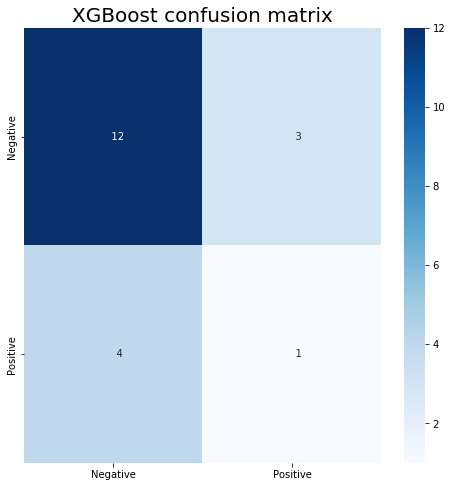

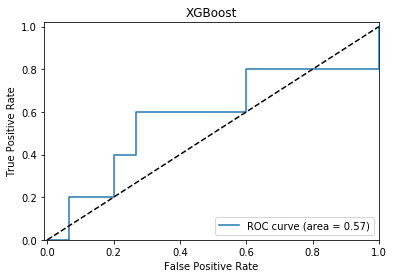

In [ ]:
evaluation(y_test, y_pred, "XGBoost")
AUROC_Curve(y_test, y_pred_softmax, "XGBoost")